## Elasto-Plastic System with Newmark-Beta

### Import Necessary Packages and Functions

In [1]:
import numpy as np
from numpy import sqrt
from matplotlib import pyplot as plt

### Set Variable Values for System

In [2]:
m = 50 #mass
k = 51.5 #stiffness
xi = 0.01 #damping ratio - use decimal not percentage
wn = sqrt(k/m)
Tn=2*np.pi/wn
c = xi*2*sqrt(m*k) # determine damping coef. from damping ratio
wd = wn*sqrt(1.0-xi**2.0)

### Establish Initial Conditions

In [3]:
## Load ground motion record
record = np.loadtxt('elcentro.txt')
record[:,1] = np.array(record[:,1])*32.174049*12 #time history was given in g - so convert to in/s^2
## Initial Conditions
f0=0 # magnitude of force
u0=0 #initial displacement
v0=0 # initial velocity

## for E-P:
fs0=u0*k
a0=(f0-c*v0-fs0)/m

### Elasto-Plastic Newmark-Beta

In [4]:
##Newmark Beta Variables - Based on Linear Acceleration Method
gamma = 1/2
beta = 1/6
T1=5 #duration of motion evaluation
dt=0.02 #time step
N=int(T1/dt) #total number of time points
t=np.arange(0.0,T1,dt) #generate time vector
f = np.zeros(N)
Fbar = np.zeros(N)
Rbar = np.zeros(N)
u = np.zeros(N)
# Du = np.zeros(1)
dudt = np.zeros(N)
dudt2 = np.zeros(N)
kT = np.zeros(N)
kbarT = np.zeros(N)
fs = np.zeros(N)
u[0]=u0
dudt[0]=v0
dudt2[0]=a0

## for E-P:
kT[0]=k
fs[0]=u[0]*kT[0]

## Newmark-Beta Method (Forced)
a1=(m/(beta*dt**2))+(gamma/(beta*dt))*c
a2=m/(beta*dt)+(gamma/beta-1)*c
a3=(1/(2*beta)-1)*m+dt*(gamma/(2*beta)-1)*c
dudt20=a0
kbarT[0] = k + a1
Fy=7.5
NFy=-7.5


for i in range (N-1):
    if i < (len(record)-1):
        f[i+1] = -m * (record[i+1,1])
    else:
        f[i+1] = 0
    u[i+1] = u[i]
    fs[i+1] = fs[i]
    kT[i+1] = kT[i]
    Fbar[i+1] = f[i+1] + a1*u[i] + a2*dudt[i] + a3*dudt2[i]
    Rbar[i+1] = Fbar[i+1]-fs[i+1]-a1*u[i+1]
    while abs(Rbar[i+1]) > 10**(-8):
        kbarT[i+1] = kT[i+1] + a1
        Du = Rbar[i+1] / kbarT[i+1]
        u[i+1] = u[i+1] + Du
        fsi = fs[i] + k * (u[i+1]-u[i])
        if fsi >= Fy:
            fs[i+1] = Fy
            kT[i+1] = 0
        elif fsi <= NFy:
            fs[i+1] = NFy
            kT[i+1] = 0
        else:
            fs[i+1] = fsi
            kT[i+1] = k
        Rbar[i+1] = Fbar[i+1]-fs[i+1]-a1*u[i+1]
    else:
        dudt[i+1]=(gamma/(beta*dt))*(u[i+1]-u[i])+(1-gamma/beta)*dudt[i]+dt*(1-gamma/(2*beta))*dudt2[i]
        dudt2[i+1]=(1/(beta*dt**2))*(u[i+1]-u[i])-dudt[i]/(beta*dt)-(1/(2*beta)-1)*dudt2[i]

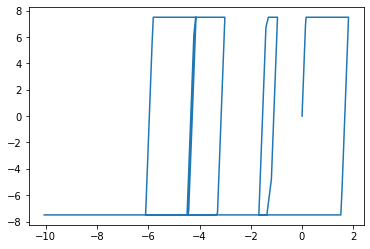

In [5]:
plt.plot(u,fs)

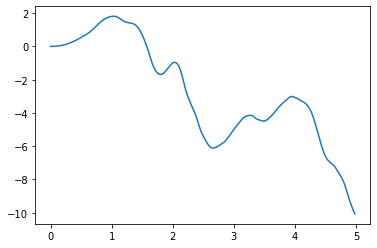

In [6]:
plt.plot(t,u)